In [2]:
import os
import numpy as np
import pandas as pd

# Import Data

In [3]:
dfAll_Stream = pd.read_csv("/home/kannika/Analysis_Valorant/final_output_valorant.csv")
print(dfAll_Stream.shape)
dfAll_Stream.head()

(795, 593)


Unnamed: 0  round       streamer character pro_player result     dead  \
0           0  รอบ 1   boltyanskiyy      Yoru        Pro    win  survive   
1           1  รอบ 2   boltyanskiyy      Yoru        Pro    win  survive   
2           2  รอบ 3   boltyanskiyy      Yoru        Pro    win     dead   
3           3  รอบ 4   boltyanskiyy      Yoru        Pro    win     dead   
4           4  รอบ 5   boltyanskiyy      Yoru        Pro    win  survive   

     Map  1  2  ...  576  577  578  579  580  581  582  583  584     sheet  
0  HAVEN  2  0  ...    0    0    0    0    0    0    0    0    0  Yoru_Pro  
1  HAVEN  3  0  ...    0    0    0    0    0    0    0    0    0  Yoru_Pro  
2  HAVEN  3  0  ...    0    0    0    0    0    0    0    0    0  Yoru_Pro  
3  HAVEN  1  0  ...    0    0    0    0    0    0    0    0    0  Yoru_Pro  
4  HAVEN  5  0  ...    0    0    0    0    0    0    0    0    0  Yoru_Pro  

[5 rows x 593 columns]

# PCA ==> 20 Component

In [10]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [11]:
my_taget = {'Yoru_Pro': 1 , 'Yoru_Normal': 2, 'Sage_Pro': 3, 'Sage_Normal':4, 'Jett_Pro':5, 'Jett_Normal':6,
               'Harbor_Pro':7, 'Harbor_Normal':8}

# streamer_taget = {'boltyanskiyy': 1 , 'prodyge': 2, 'reazrizz_sage': 3, 'Katheryn':4, 'axa_zinatraa':5, 'ilyNeris':6,
#                        'Ludilue':7, 'bmgx93':8}
print(my_taget)
#print(streamer_taget)

## Map 
dfAll_Stream['taget'] = dfAll_Stream['sheet'].replace(my_taget)
#dfAll_Stream['streamer_taget'] = dfAll_Stream['streamer'].replace(streamer_taget)

{'Yoru_Pro': 1, 'Yoru_Normal': 2, 'Sage_Pro': 3, 'Sage_Normal': 4, 'Jett_Pro': 5, 'Jett_Normal': 6, 'Harbor_Pro': 7, 'Harbor_Normal': 8}


In [12]:
dfAll_Stream

Unnamed: 0  round       streamer character pro_player result     dead  \
0             0  รอบ 1   boltyanskiyy      Yoru        Pro    win  survive   
1             1  รอบ 2   boltyanskiyy      Yoru        Pro    win  survive   
2             2  รอบ 3   boltyanskiyy      Yoru        Pro    win     dead   
3             3  รอบ 4   boltyanskiyy      Yoru        Pro    win     dead   
4             4  รอบ 5   boltyanskiyy      Yoru        Pro    win  survive   
..          ...    ...            ...       ...        ...    ...      ...   
790         790     20       Karretto    Harbor     Normal    win     dead   
791         791     21       Karretto    Harbor     Normal   lose     dead   
792         792     22       Karretto    Harbor     Normal   lose     dead   
793         793     23       Karretto    Harbor     Normal    win  survive   
794         794     24       Karretto    Harbor     Normal    win     dead   

       Map  1  2  ...  577  578  579  580  581  582  583  584          sheet  \
0    HAVEN  2  0  ...    0    0    0    0    0    0    0    0       Yoru_Pro   
1    HAVEN  3  0  ...    0    0    0    0    0    0    0    0       Yoru_Pro   
2    HAVEN  3  0  ...    0    0    0    0    0    0    0    0       Yoru_Pro   
3    HAVEN  1  0  ...    0    0    0    0    0    0    0    0       Yoru_Pro   
4    HAVEN  5  0  ...    0    0    0    0    0    0    0    0       Yoru_Pro   
..     ... .. ..  ...  ...  ...  ...  ...  ...  ...  ...  ...            ...   
790  Split  2  0  ...    0    0    0    0    0    0    0    0  Harbor_Normal   
791  Split  3  0  ...    0    0    0    0    0    0    0    0  Harbor_Normal   
792  Split  1  0  ...    0    0    0    0    0    0    0    0  Harbor_Normal   
793  Split  4  0  ...    0    0    0    0    0    0    0    0  Harbor_Normal   
794  Split  1  0  ...    0    0    0    0    0    0    0    0  Harbor_Normal   

     taget  
0        1  
1        1  
2        1  
3        1  
4        1  
..     ...  
790      8  
791      8  
792      8  
793      8  
794      8  

[795 rows x 594 columns]

In [13]:
print("taget:", list(set(dfAll_Stream["taget"])))
#print("Streamer:", list(set(dfAll_Stream["streamer_taget"])))

taget: [1, 2, 3, 4, 5, 6, 7, 8]


In [19]:
X = dfAll_Stream.iloc[:,8:592]
y = dfAll_Stream.iloc[:,592]

print(X.shape)
print(y.shape)

(795, 584)
(795,)


In [20]:
X

1  2   3   4  5  6  7   8  9  10  ...  575  576  577  578  579  580  581  \
0    2  0   9  31  3  0  0   1  0   1  ...    0    0    0    0    0    0    0   
1    3  0   8  26  9  0  0   3  0   2  ...    0    0    0    0    0    0    0   
2    3  0   6  16  1  0  0   1  0   0  ...    0    0    0    0    0    0    0   
3    1  0   7   7  0  0  0   7  0   0  ...    0    0    0    0    0    0    0   
4    5  0   8  22  0  0  0   3  0   0  ...    0    0    0    0    0    0    0   
..  .. ..  ..  .. .. .. ..  .. ..  ..  ...  ...  ...  ...  ...  ...  ...  ...   
790  2  0  11  13  2  0  0  23  0   1  ...    0    0    0    0    0    0    0   
791  3  0  18  17  0  0  0  23  0   2  ...    0    0    0    0    0    0    0   
792  1  0  15  17  1  0  0  13  0   0  ...    0    0    0    0    0    0    0   
793  4  0   7  50  3  0  0   1  0   0  ...    0    0    0    0    0    0    0   
794  1  0  13  26  0  0  0  19  0   1  ...    0    0    0    0    0    0    0   

     582  583  584  
0      0    0    0  
1      0    0    0  
2      0    0    0  
3      0    0    0  
4      0    0    0  
..   ...  ...  ...  
790    0    0    0  
791    0    0    0  
792    0    0    0  
793    0    0    0  
794    0    0    0  

[795 rows x 584 columns]

In [21]:
y

0           Yoru_Pro
1           Yoru_Pro
2           Yoru_Pro
3           Yoru_Pro
4           Yoru_Pro
           ...      
790    Harbor_Normal
791    Harbor_Normal
792    Harbor_Normal
793    Harbor_Normal
794    Harbor_Normal
Name: sheet, Length: 795, dtype: object

In [22]:
# Dimention Reduction
x_scaled = StandardScaler().fit_transform(X)
pca = PCA(n_components=20)
pca_features = pca.fit_transform(x_scaled)
 
# Show PCA characteristics
print('Shape before PCA: ', x_scaled.shape)
print('Shape after PCA: ', pca_features.shape)

print ('Cumulative variance explained by 2 principal components: {:.2%}'.format(np.sum(pca.explained_variance_ratio_)))

Shape before PCA:  (795, 584)
Shape after PCA:  (795, 20)
Cumulative variance explained by 2 principal components: 73.08%


In [24]:
list_pca = []
for j in range(1, 21):
    #print(j)
    columnName = f"PCA{j}"
    list_pca.append(columnName)

pca_df = pd.DataFrame(data=pca_features, columns=list_pca)
pca_df['target'] = dfAll_Stream['sheet']
# pca_df['streamer_taget'] = dfAll_Stream['streamer_taget']
print(pca_df.shape)
pca_df

(795, 21)


PCA1      PCA2      PCA3      PCA4      PCA5      PCA6      PCA7  \
0   -3.234954  2.646490 -1.363785  0.697632 -0.587106 -3.058047 -0.944579   
1   -2.254790  4.847817 -2.424110  0.525520  1.764791 -6.608064  3.988040   
2   -1.740959 -0.740264 -0.290554 -1.002252 -0.277946  0.068022 -0.517086   
3   -2.476322 -0.788739 -0.577032 -0.994176 -0.991954  2.164385 -0.795377   
4   -2.222565 -1.045015  0.299354 -0.201508 -0.883724  0.327142 -1.116856   
..        ...       ...       ...       ...       ...       ...       ...   
790 -2.773796 -1.298433  0.790118 -0.595878 -0.156181  0.693902  4.369644   
791 -2.561967 -0.673596  0.086863 -0.937034 -1.295517  2.715803  2.482160   
792 -2.992739 -0.930832  0.163453 -0.889678 -0.774730  1.809828  2.536119   
793 -2.558951  1.043780 -0.245703  1.158119 -0.210105 -3.667310 -1.981677   
794 -3.428628 -0.492090  0.085496 -0.416645 -1.347691  1.609567  0.996229   

         PCA8      PCA9     PCA10  ...     PCA12     PCA13     PCA14  \
0   -0.048041 -0.237823 -0.486047  ... -1.197676  0.717181  0.425697   
1   -0.747170 -0.203549 -0.611414  ... -1.164992 -0.261405  0.995015   
2    0.142848  0.283790 -0.109348  ...  0.098869 -0.515907 -0.256302   
3   -0.200891  1.538416  1.249367  ... -0.678972 -0.379508  1.703227   
4    0.045430 -0.277744  0.145204  ... -0.658447  1.297520 -0.083133   
..        ...       ...       ...  ...       ...       ...       ...   
790 -1.175376  0.740287  0.085584  ...  0.147659 -0.037347 -0.540870   
791 -0.748913  0.221474  0.531064  ...  0.357759  1.056673 -2.006096   
792 -0.867823  0.255830  0.619016  ...  0.140458  0.550661 -1.078968   
793  0.444344 -0.817247 -0.970973  ...  0.332679  0.300361  1.446448   
794 -0.464726  0.185447  0.047557  ...  0.500009  0.310554 -0.984350   

        PCA15     PCA16     PCA17     PCA18     PCA19     PCA20         target  
0    1.316572 -0.119818 -2.404223 -1.608481  1.594675  0.325772       Yoru_Pro  
1   -1.837449 -0.855466 -0.744504  0.140695  0.998600 -0.469430       Yoru_Pro  
2    0.077824 -0.811585  0.390811  0.553064 -0.270148 -1.137107       Yoru_Pro  
3   -0.424533  0.552526 -0.545517 -0.840042 -0.392663  1.037560       Yoru_Pro  
4    0.957047  0.030708 -2.765744 -2.500969  0.961837 -0.466683       Yoru_Pro  
..        ...       ...       ...       ...       ...       ...            ...  
790  0.081208 -1.608785  1.869307  0.564716 -1.557491 -0.425057  Harbor_Normal  
791  2.006176 -0.330873  1.526333  0.713056 -1.096268  0.087873  Harbor_Normal  
792  1.049098 -1.122180  0.079005 -0.876295 -0.627929 -1.149260  Harbor_Normal  
793  0.823473  0.379500  0.857197  0.906670  0.827664  1.000323  Harbor_Normal  
794  2.194832 -0.564594  0.468663  0.869280  0.141003 -0.118699  Harbor_Normal  

[795 rows x 21 columns]

# Plot the 2D PCA Graph

In [25]:
dfYoru_Pro = pca_df[pca_df["target"]=='Yoru_Pro']
dfYoru_Normal = pca_df[pca_df["target"]=='Yoru_Normal']
dfSage_Pro = pca_df[pca_df["target"]=='Sage_Pro']
dfSage_Normal = pca_df[pca_df["target"]=='Sage_Normal']
dfJett_Pro = pca_df[pca_df["target"]=='Jett_Pro']
dfJett_Normal = pca_df[pca_df["target"]=='Jett_Normal']
dfHarbor_Pro = pca_df[pca_df["target"]=='Harbor_Pro']
dfHarbor_Normal = pca_df[pca_df["target"]=='Harbor_Normal']

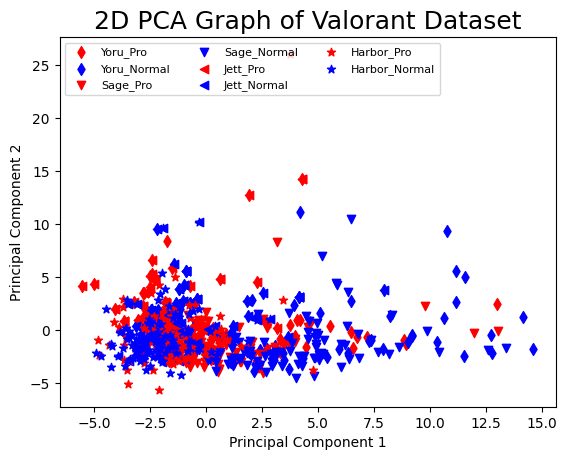

In [26]:
import matplotlib.pyplot as plt
from numpy.random import random

#fig = plt.figure(figsize=(8, 5))

marker_ = ["d", "o","v", "^", "<", "D", "*", "+"]

Yoru_Pro = plt.scatter(dfYoru_Pro["PCA1"], dfYoru_Pro["PCA2"], marker=marker_[0], color='red')
Yoru_Normal = plt.scatter(dfYoru_Normal["PCA1"], dfYoru_Normal["PCA2"], marker=marker_[0], color='blue')
Sage_Pro = plt.scatter(dfSage_Pro["PCA1"], dfSage_Pro["PCA2"], marker=marker_[2], color='red')
Sage_Normal = plt.scatter(dfSage_Normal["PCA1"], dfSage_Normal["PCA2"], marker=marker_[2], color='blue')
Jett_Pro = plt.scatter(dfJett_Pro["PCA1"], dfJett_Pro["PCA2"], marker=marker_[4], color='red')
Jett_Normal = plt.scatter(dfJett_Normal["PCA1"], dfJett_Normal["PCA2"], marker=marker_[4], color='blue')
Harbor_Pro = plt.scatter(dfHarbor_Pro["PCA1"], dfHarbor_Pro["PCA2"], marker=marker_[6], color='red')
Harbor_Normal = plt.scatter(dfHarbor_Normal["PCA1"], dfHarbor_Normal["PCA2"], marker=marker_[6], color='blue')


plt.legend((Yoru_Pro, Yoru_Normal, Sage_Pro, Sage_Normal, Jett_Pro, Jett_Normal, Harbor_Pro, Harbor_Normal),
           ('Yoru_Pro', 'Yoru_Normal', 'Sage_Pro', 'Sage_Normal', 'Jett_Pro', 'Jett_Normal', 'Harbor_Pro', 'Harbor_Normal'),
           scatterpoints=1,
           loc='upper left',
           ncol=3,
           fontsize=8)

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title('2D PCA Graph of Valorant Dataset', fontsize=18)
plt.show()

# ⚙️CLUSTERING ANALYSIS

In [27]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

from yellowbrick.cluster import KElbowVisualizer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
from sklearn import metrics

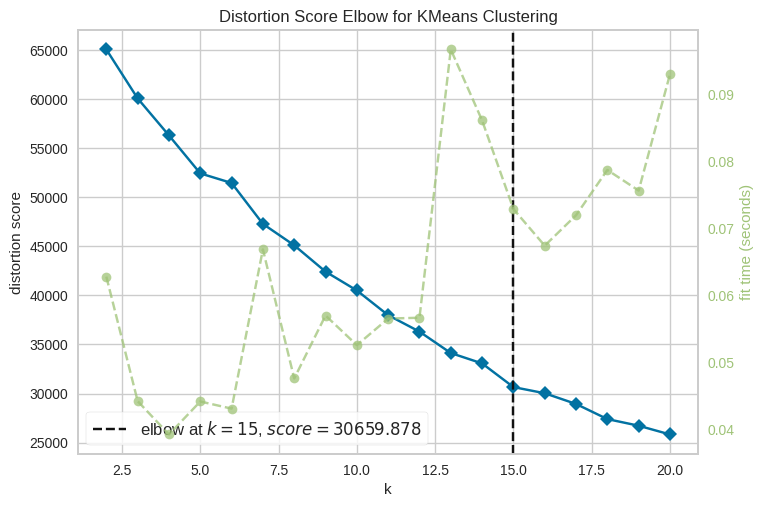

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [28]:
pca_diabetes = pca_df.iloc[:,0:20]

model = KMeans()
visualizer = KElbowVisualizer(model, k=20)

visualizer.fit(pca_diabetes)        # Fit the data to the visualizer
visualizer.show()  

## #️⃣1. K=10

In [29]:
kmeans_V1 = KMeans(n_clusters=10, init='k-means++', max_iter=30000,n_init=1000, random_state=42)
clusters_V1 = kmeans_V1.fit_predict(pca_diabetes)

In [30]:
#centers = np.array(model2.cluster_centers_)

In [31]:
centroids = kmeans_V1.cluster_centers_
#centroids_pca = pca_2.transform(centroids)
#centroids

In [32]:
pca_df['Cluster_K10'] = clusters_V1
print(pca_df.shape)
pca_df.head()

(795, 22)


PCA1      PCA2      PCA3      PCA4      PCA5      PCA6      PCA7  \
0 -3.234954  2.646490 -1.363785  0.697632 -0.587106 -3.058047 -0.944579   
1 -2.254790  4.847817 -2.424110  0.525520  1.764791 -6.608064  3.988040   
2 -1.740959 -0.740264 -0.290554 -1.002252 -0.277946  0.068022 -0.517086   
3 -2.476322 -0.788739 -0.577032 -0.994176 -0.991954  2.164385 -0.795377   
4 -2.222565 -1.045015  0.299354 -0.201508 -0.883724  0.327142 -1.116856   

       PCA8      PCA9     PCA10  ...     PCA13     PCA14     PCA15     PCA16  \
0 -0.048041 -0.237823 -0.486047  ...  0.717181  0.425697  1.316572 -0.119818   
1 -0.747170 -0.203549 -0.611414  ... -0.261405  0.995015 -1.837449 -0.855466   
2  0.142848  0.283790 -0.109348  ... -0.515907 -0.256302  0.077824 -0.811585   
3 -0.200891  1.538416  1.249367  ... -0.379508  1.703227 -0.424533  0.552526   
4  0.045430 -0.277744  0.145204  ...  1.297520 -0.083133  0.957047  0.030708   

      PCA17     PCA18     PCA19     PCA20    target  Cluster_K10  
0 -2.404223 -1.608481  1.594675  0.325772  Yoru_Pro            2  
1 -0.744504  0.140695  0.998600 -0.469430  Yoru_Pro            2  
2  0.390811  0.553064 -0.270148 -1.137107  Yoru_Pro            5  
3 -0.545517 -0.840042 -0.392663  1.037560  Yoru_Pro            5  
4 -2.765744 -2.500969  0.961837 -0.466683  Yoru_Pro            5  

[5 rows x 22 columns]

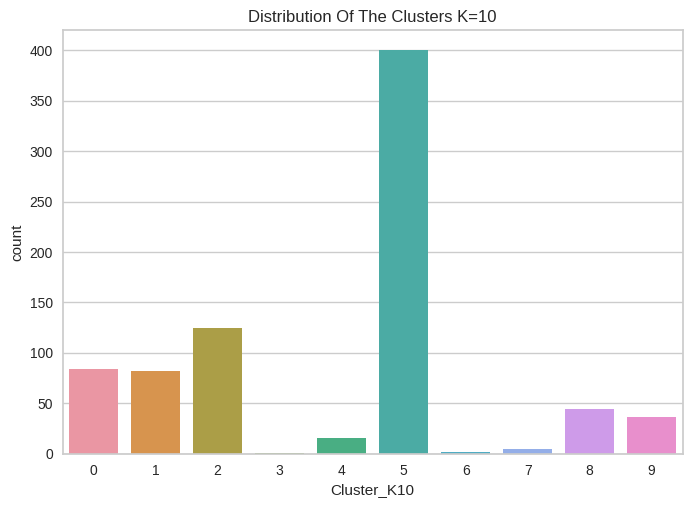

In [33]:
#Plotting countplot of clusters
import seaborn as sns

pl = sns.countplot(x=pca_df["Cluster_K10"])
pl.set_title("Distribution Of The Clusters K=10")
plt.show()

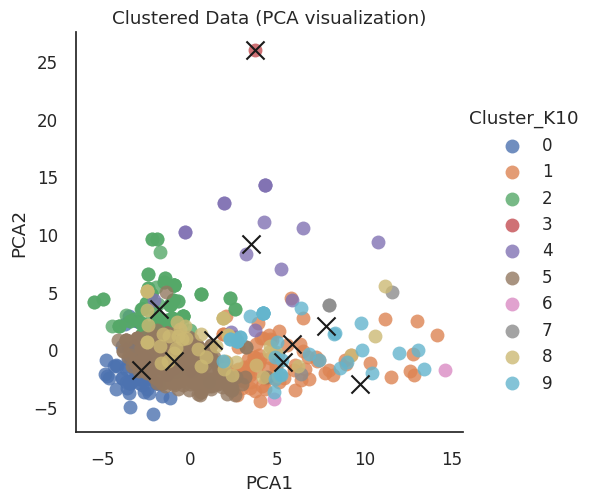

In [34]:
import matplotlib.pyplot as plt 
import seaborn as sns

sns.set(style='white', rc={'figure.figsize':(9,6)},font_scale=1.1)
# Plot 2D PCA Graph
sns.lmplot(
    x='PCA1', 
    y='PCA2', 
    data=pca_df, 
    hue='Cluster_K10',
    scatter_kws={"s": 100},
    fit_reg=False, 
    legend=True
    )
plt.scatter(centroids[:,0], centroids[:,1], marker="x", color='k', s=170)
plt.title('Clustered Data (PCA visualization)')
plt.show()

In [35]:
pca_df0 = pca_df[['PCA1', 'PCA2','Cluster_K10']]
result = pd.concat([dfAll_Stream, pca_df0], axis=1)
#print(result.shape)

result['COUNTER'] =1       #initially, set that counter to 1.
group_data = result.groupby(['Cluster_K10','pro_player','character', 'result', 'dead'])['COUNTER'].sum() #sum function
#print(group_data)
grouped_df = group_data.to_frame()
grouped_df

COUNTER
Cluster_K10 pro_player character result dead            
0           Normal     Harbor    lose   dead          28
                                 win    dead          16
                                        survive        2
                       Jett      lose   dead           8
                                 win    dead           3
...                                                  ...
9           Pro        Jett      lose   dead           2
                       Yoru      win    dead           2
                       sage      lose   dead           1
                                        survive        1
                                 win    dead           1

[129 rows x 1 columns]

## #️⃣2. K=2

In [36]:
pca_diabetes_ = pca_diabetes.iloc[:,0:20]
pca_diabetes_

PCA1      PCA2      PCA3      PCA4      PCA5      PCA6      PCA7  \
0   -3.234954  2.646490 -1.363785  0.697632 -0.587106 -3.058047 -0.944579   
1   -2.254790  4.847817 -2.424110  0.525520  1.764791 -6.608064  3.988040   
2   -1.740959 -0.740264 -0.290554 -1.002252 -0.277946  0.068022 -0.517086   
3   -2.476322 -0.788739 -0.577032 -0.994176 -0.991954  2.164385 -0.795377   
4   -2.222565 -1.045015  0.299354 -0.201508 -0.883724  0.327142 -1.116856   
..        ...       ...       ...       ...       ...       ...       ...   
790 -2.773796 -1.298433  0.790118 -0.595878 -0.156181  0.693902  4.369644   
791 -2.561967 -0.673596  0.086863 -0.937034 -1.295517  2.715803  2.482160   
792 -2.992739 -0.930832  0.163453 -0.889678 -0.774730  1.809828  2.536119   
793 -2.558951  1.043780 -0.245703  1.158119 -0.210105 -3.667310 -1.981677   
794 -3.428628 -0.492090  0.085496 -0.416645 -1.347691  1.609567  0.996229   

         PCA8      PCA9     PCA10     PCA11     PCA12     PCA13     PCA14  \
0   -0.048041 -0.237823 -0.486047 -0.097576 -1.197676  0.717181  0.425697   
1   -0.747170 -0.203549 -0.611414 -2.857954 -1.164992 -0.261405  0.995015   
2    0.142848  0.283790 -0.109348  0.297001  0.098869 -0.515907 -0.256302   
3   -0.200891  1.538416  1.249367  0.818153 -0.678972 -0.379508  1.703227   
4    0.045430 -0.277744  0.145204  0.678278 -0.658447  1.297520 -0.083133   
..        ...       ...       ...       ...       ...       ...       ...   
790 -1.175376  0.740287  0.085584 -1.635708  0.147659 -0.037347 -0.540870   
791 -0.748913  0.221474  0.531064 -0.710483  0.357759  1.056673 -2.006096   
792 -0.867823  0.255830  0.619016 -0.295171  0.140458  0.550661 -1.078968   
793  0.444344 -0.817247 -0.970973 -0.652620  0.332679  0.300361  1.446448   
794 -0.464726  0.185447  0.047557  0.310649  0.500009  0.310554 -0.984350   

        PCA15     PCA16     PCA17     PCA18     PCA19     PCA20  
0    1.316572 -0.119818 -2.404223 -1.608481  1.594675  0.325772  
1   -1.837449 -0.855466 -0.744504  0.140695  0.998600 -0.469430  
2    0.077824 -0.811585  0.390811  0.553064 -0.270148 -1.137107  
3   -0.424533  0.552526 -0.545517 -0.840042 -0.392663  1.037560  
4    0.957047  0.030708 -2.765744 -2.500969  0.961837 -0.466683  
..        ...       ...       ...       ...       ...       ...  
790  0.081208 -1.608785  1.869307  0.564716 -1.557491 -0.425057  
791  2.006176 -0.330873  1.526333  0.713056 -1.096268  0.087873  
792  1.049098 -1.122180  0.079005 -0.876295 -0.627929 -1.149260  
793  0.823473  0.379500  0.857197  0.906670  0.827664  1.000323  
794  2.194832 -0.564594  0.468663  0.869280  0.141003 -0.118699  

[795 rows x 20 columns]

In [37]:
kmeans_V2 = KMeans(n_clusters=2, init='k-means++', max_iter=30000,n_init=1000, random_state=42)
clusters_V2 = kmeans_V2.fit_predict(pca_diabetes_)

In [38]:
centroids_V2 = kmeans_V2.cluster_centers_
#centroids_pca = pca_2.transform(centroids)
centroids_V2

array([[ 5.5172171 ,  0.55767142,  0.34730633, -0.02456821, -0.55785513,
        -0.07589131,  0.35748511, -0.09243278,  0.15223031,  0.1016007 ,
        -0.03966254,  0.23875646, -0.08697379, -0.16087683,  0.09910965,
         0.03239049,  0.16652043, -0.14475431,  0.07528085,  0.41401021],
       [-1.32550926, -0.13398034, -0.08344021,  0.0059025 ,  0.13402448,
         0.01823286, -0.08588566,  0.02220694, -0.03657327, -0.02440953,
         0.00952891, -0.05736115,  0.02089542,  0.0386506 , -0.02381106,
        -0.0077818 , -0.04000647,  0.03477717, -0.0180862 , -0.09946579]])

In [39]:
pca_df['Cluster_K2'] = clusters_V2
print(pca_df.shape)
pca_df.head()

(795, 23)


PCA1      PCA2      PCA3      PCA4      PCA5      PCA6      PCA7  \
0 -3.234954  2.646490 -1.363785  0.697632 -0.587106 -3.058047 -0.944579   
1 -2.254790  4.847817 -2.424110  0.525520  1.764791 -6.608064  3.988040   
2 -1.740959 -0.740264 -0.290554 -1.002252 -0.277946  0.068022 -0.517086   
3 -2.476322 -0.788739 -0.577032 -0.994176 -0.991954  2.164385 -0.795377   
4 -2.222565 -1.045015  0.299354 -0.201508 -0.883724  0.327142 -1.116856   

       PCA8      PCA9     PCA10  ...     PCA14     PCA15     PCA16     PCA17  \
0 -0.048041 -0.237823 -0.486047  ...  0.425697  1.316572 -0.119818 -2.404223   
1 -0.747170 -0.203549 -0.611414  ...  0.995015 -1.837449 -0.855466 -0.744504   
2  0.142848  0.283790 -0.109348  ... -0.256302  0.077824 -0.811585  0.390811   
3 -0.200891  1.538416  1.249367  ...  1.703227 -0.424533  0.552526 -0.545517   
4  0.045430 -0.277744  0.145204  ... -0.083133  0.957047  0.030708 -2.765744   

      PCA18     PCA19     PCA20    target  Cluster_K10  Cluster_K2  
0 -1.608481  1.594675  0.325772  Yoru_Pro            2           1  
1  0.140695  0.998600 -0.469430  Yoru_Pro            2           1  
2  0.553064 -0.270148 -1.137107  Yoru_Pro            5           1  
3 -0.840042 -0.392663  1.037560  Yoru_Pro            5           1  
4 -2.500969  0.961837 -0.466683  Yoru_Pro            5           1  

[5 rows x 23 columns]

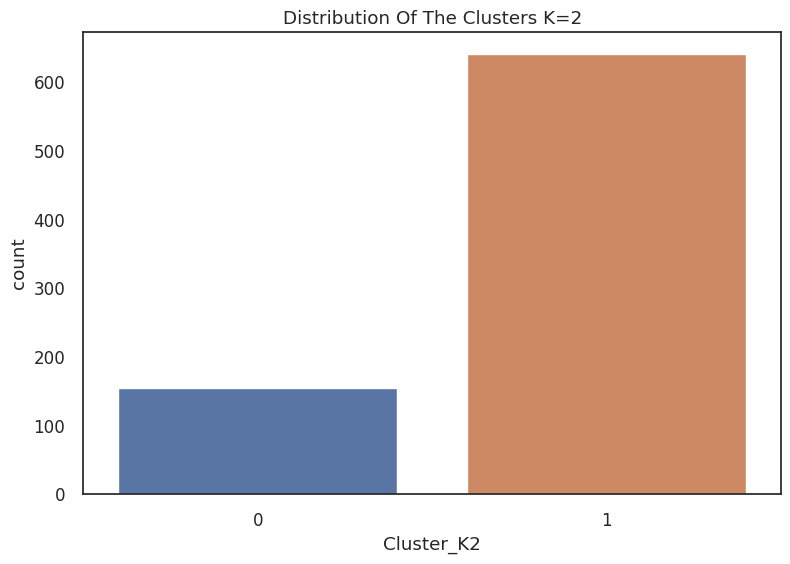

In [40]:
#Plotting countplot of clusters
import seaborn as sns

pl = sns.countplot(x=pca_df["Cluster_K2"])
pl.set_title("Distribution Of The Clusters K=2")
plt.show()

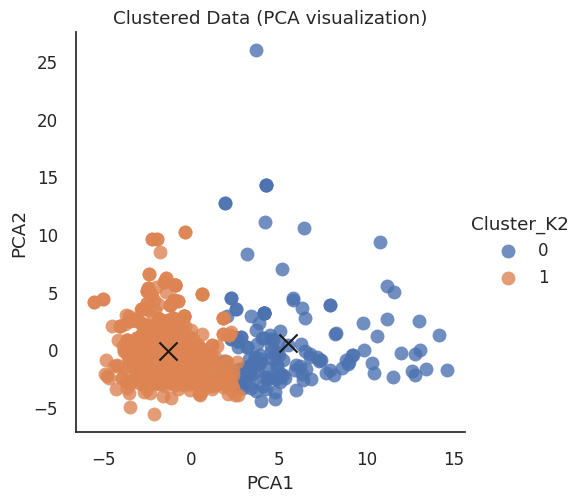

In [43]:
import matplotlib.pyplot as plt 
import seaborn as sns

sns.set(style='white', rc={'figure.figsize':(9,6)},font_scale=1.1)
# Plot 2D PCA Graph
sns.lmplot(
    x='PCA1', 
    y='PCA2', 
    data=pca_df, 
    hue='Cluster_K2',
    scatter_kws={"s": 100},
    fit_reg=False, 
    legend=True
    )
plt.scatter(centroids_V2[:,0], centroids_V2[:,1], marker="x", color='k', s=170)
plt.title('Clustered Data (PCA visualization)')
plt.show()

In [44]:
pca_df0 = pca_df[['PCA1', 'PCA2','Cluster_K2']]
result = pd.concat([dfAll_Stream, pca_df0], axis=1)
#print(result.shape)

result['COUNTER'] =1       #initially, set that counter to 1.
group_data = result.groupby(['Cluster_K2','pro_player','character', 'result', 'dead'])['COUNTER'].sum() #sum function
#print(group_data)
grouped_df = group_data.to_frame()
grouped_df

COUNTER
Cluster_K2 pro_player character result dead            
0          Normal     Harbor    lose   dead           1
                                win    dead           1
                                       survive        1
                      Jett      lose   dead           2
                                win    dead           3
                                       survive        4
                      Yoru      lose   dead          22
                                       survive        1
                                win    dead          11
                                       survive        7
                      sage      lose   dead          15
                                       survive        9
                                win    dead          16
                                       survive       14
           Pro        Harbor    win    survive        3
                      Jett      lose   dead           4
                                win    dead           3
                      Yoru      lose   dead           9
                                win    dead          15
                      sage      lose   dead           2
                                       survive        3
                                win    dead           5
                                       survive        3
1          Normal     Harbor    lose   dead          59
                                       survive        1
                                win    dead          25
                                       survive       23
                      Jett      lose   dead          57
                                win    dead          24
                                       survive       16
                      Yoru      lose   dead          28
                                       survive        3
                                win    dead          14
                                       survive       12
                      sage      lose   dead          20
                                       survive        6
                                win    dead          10
                                       survive        5
           Pro        Harbor    dead   lose           1
                                lose   dead          47
                                win    dead          30
                                       survive       18
                      Jett      lose   dead          55
                                win    dead          22
                                       survive       28
                      Yoru      lose   dead          15
                                       survive        4
                                win    dead          37
                                       survive        9
                      sage      lose   dead          39
                                       survive        3
                                win    dead          23
                                       survive        7

## #️⃣3. K=3

In [45]:
kmeans_V3 = KMeans(n_clusters=3, init='k-means++', max_iter=30000,n_init=1000, random_state=42)
clusters_V3 = kmeans_V3.fit_predict(pca_diabetes_)

In [46]:
centroids_V3 = kmeans_V3.cluster_centers_
#centroids_pca = pca_2.transform(centroids)
centroids_V3

array([[-1.39910711e+00, -1.00790652e-01, -2.16509052e-01,
         4.38630303e-02,  8.70837513e-02, -9.80525375e-03,
        -3.49367988e-02,  4.48283071e-02, -1.80233730e-02,
        -2.10553120e-02, -1.31871590e-03, -3.09108778e-02,
         4.82790436e-02,  7.89970122e-03, -1.43712489e-02,
         4.18162805e-03, -3.29527081e-02,  7.53964883e-02,
        -2.74050501e-02, -6.95024879e-02],
       [ 5.37127969e+00, -7.54001686e-01, -4.00384109e-01,
         3.58324010e-01, -4.06397574e-01, -2.47292254e-01,
         3.41887032e-01,  1.66256710e-01,  2.15749853e-01,
         6.52073376e-02,  2.27792843e-02, -3.85517766e-02,
        -2.67441816e-01, -5.45508977e-02,  1.67025148e-01,
         7.37767634e-02,  1.76043734e-02, -2.53981746e-01,
         5.94891608e-02,  3.99024198e-01],
       [ 3.22263505e+00,  9.86680077e+00,  1.08986968e+01,
        -4.54886908e+00,  4.08060375e-01,  2.42870590e+00,
        -1.67396276e+00, -2.96048399e+00, -1.19607609e+00,
         1.80447484e-01, -1.4

In [47]:
pca_df['Cluster_K3'] = clusters_V3
print(pca_df.shape)
pca_df.head()

(795, 24)


PCA1      PCA2      PCA3      PCA4      PCA5      PCA6      PCA7  \
0 -3.234954  2.646490 -1.363785  0.697632 -0.587106 -3.058047 -0.944579   
1 -2.254790  4.847817 -2.424110  0.525520  1.764791 -6.608064  3.988040   
2 -1.740959 -0.740264 -0.290554 -1.002252 -0.277946  0.068022 -0.517086   
3 -2.476322 -0.788739 -0.577032 -0.994176 -0.991954  2.164385 -0.795377   
4 -2.222565 -1.045015  0.299354 -0.201508 -0.883724  0.327142 -1.116856   

       PCA8      PCA9     PCA10  ...     PCA15     PCA16     PCA17     PCA18  \
0 -0.048041 -0.237823 -0.486047  ...  1.316572 -0.119818 -2.404223 -1.608481   
1 -0.747170 -0.203549 -0.611414  ... -1.837449 -0.855466 -0.744504  0.140695   
2  0.142848  0.283790 -0.109348  ...  0.077824 -0.811585  0.390811  0.553064   
3 -0.200891  1.538416  1.249367  ... -0.424533  0.552526 -0.545517 -0.840042   
4  0.045430 -0.277744  0.145204  ...  0.957047  0.030708 -2.765744 -2.500969   

      PCA19     PCA20    target  Cluster_K10  Cluster_K2  Cluster_K3  
0  1.594675  0.325772  Yoru_Pro            2           1           0  
1  0.998600 -0.469430  Yoru_Pro            2           1           0  
2 -0.270148 -1.137107  Yoru_Pro            5           1           0  
3 -0.392663  1.037560  Yoru_Pro            5           1           0  
4  0.961837 -0.466683  Yoru_Pro            5           1           0  

[5 rows x 24 columns]

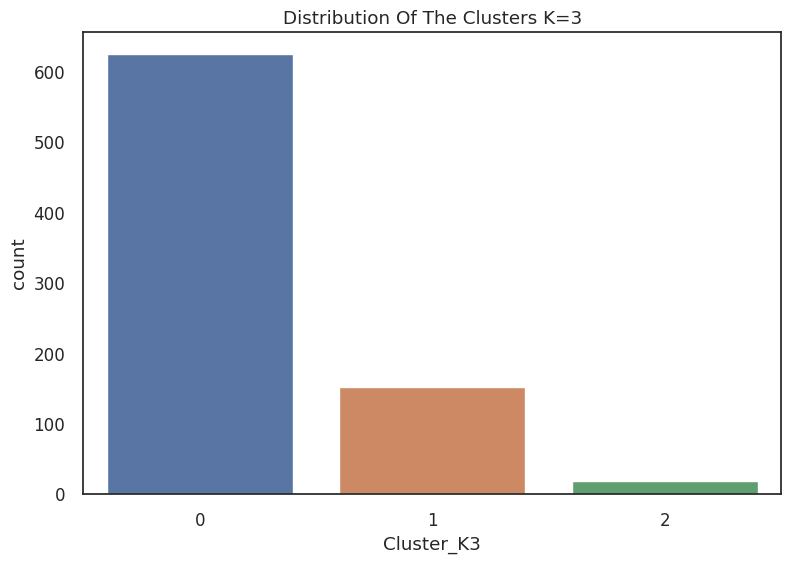

In [48]:
#Plotting countplot of clusters
import seaborn as sns

pl = sns.countplot(x=pca_df["Cluster_K3"])
pl.set_title("Distribution Of The Clusters K=3")
plt.show()

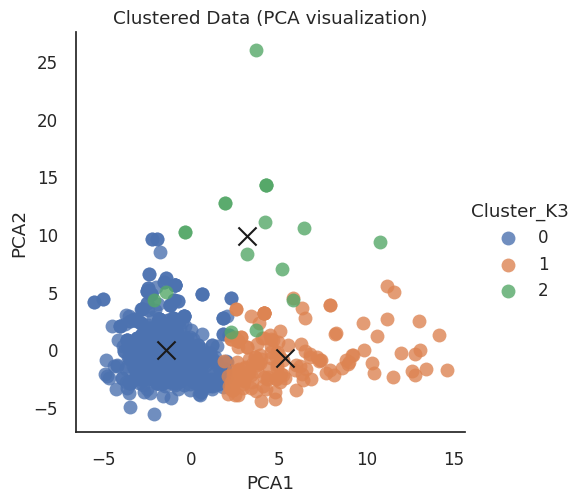

In [49]:
import matplotlib.pyplot as plt 
import seaborn as sns

sns.set(style='white', rc={'figure.figsize':(9,6)},font_scale=1.1)
# Plot 2D PCA Graph
sns.lmplot(
    x='PCA1', 
    y='PCA2', 
    data=pca_df, 
    hue='Cluster_K3',
    scatter_kws={"s": 100},
    fit_reg=False, 
    legend=True
    )
plt.scatter(centroids_V3[:,0], centroids_V3[:,1], marker="x", color='k', s=170)
plt.title('Clustered Data (PCA visualization)')
plt.show()

In [50]:
pca_df0 = pca_df[['PCA1', 'PCA2','Cluster_K3']]
result = pd.concat([dfAll_Stream, pca_df0], axis=1)
#print(result.shape)

result['COUNTER'] =1       #initially, set that counter to 1.
group_data = result.groupby(['Cluster_K3','pro_player','character', 'result', 'dead'])['COUNTER'].sum() #sum function
#print(group_data)
grouped_df = group_data.to_frame()
grouped_df

COUNTER
Cluster_K3 pro_player character result dead            
0          Normal     Harbor    lose   dead          58
                                       survive        1
                                win    dead          25
                                       survive       23
                      Jett      lose   dead          56
...                                                 ...
2          Pro        Harbor    win    survive        2
                      Jett      lose   dead           1
                                win    dead           2
                      Yoru      win    dead           2
                      sage      win    survive        1

[64 rows x 1 columns]

## #️⃣4. K=4

In [51]:
kmeans_V4 = KMeans(n_clusters=4, init='k-means++', max_iter=30000,n_init=1000, random_state=42)
clusters_V4 = kmeans_V4.fit_predict(pca_diabetes_)

centroids_V4 = kmeans_V4.cluster_centers_
#centroids_pca = pca_2.transform(centroids)
centroids_V4

array([[ 4.97540611e+00, -1.31645726e+00, -7.83835266e-01,
        -1.30850209e+00,  2.35960850e+00, -2.02529201e-01,
         1.29130610e-01, -1.40137825e-01,  2.61517022e-01,
        -7.83623481e-02,  1.15515989e-02, -1.40093428e-01,
         3.31664282e-02, -4.79918289e-01,  4.34650844e-01,
         1.33415114e-01,  8.10130262e-02, -2.08734066e-01,
         1.15203145e-01,  5.91002960e-01],
       [ 4.95736034e+00,  4.39829015e-01,  4.51715648e-01,
         3.92600241e+00, -5.93685851e+00, -3.52491030e-01,
         9.28982487e-01,  5.23101754e-01, -3.82628754e-01,
         1.27844555e+00, -4.62513520e-02,  4.51303018e-01,
        -9.42589660e-01,  4.49230265e-01, -9.86780164e-02,
         1.84023888e-01, -1.95658491e-01, -1.33760583e-01,
        -4.07268707e-01, -2.91054815e-01],
       [ 2.86805845e+00,  9.49861357e+00,  1.08135281e+01,
        -4.34878269e+00,  3.45754567e-01,  2.42883010e+00,
        -1.46929037e+00, -3.03892832e+00, -1.34390361e+00,
         1.43934396e-01, -6.5

In [52]:
pca_df['Cluster_K4'] = clusters_V4
print(pca_df.shape)
pca_df.head()

(795, 25)


PCA1      PCA2      PCA3      PCA4      PCA5      PCA6      PCA7  \
0 -3.234954  2.646490 -1.363785  0.697632 -0.587106 -3.058047 -0.944579   
1 -2.254790  4.847817 -2.424110  0.525520  1.764791 -6.608064  3.988040   
2 -1.740959 -0.740264 -0.290554 -1.002252 -0.277946  0.068022 -0.517086   
3 -2.476322 -0.788739 -0.577032 -0.994176 -0.991954  2.164385 -0.795377   
4 -2.222565 -1.045015  0.299354 -0.201508 -0.883724  0.327142 -1.116856   

       PCA8      PCA9     PCA10  ...     PCA16     PCA17     PCA18     PCA19  \
0 -0.048041 -0.237823 -0.486047  ... -0.119818 -2.404223 -1.608481  1.594675   
1 -0.747170 -0.203549 -0.611414  ... -0.855466 -0.744504  0.140695  0.998600   
2  0.142848  0.283790 -0.109348  ... -0.811585  0.390811  0.553064 -0.270148   
3 -0.200891  1.538416  1.249367  ...  0.552526 -0.545517 -0.840042 -0.392663   
4  0.045430 -0.277744  0.145204  ...  0.030708 -2.765744 -2.500969  0.961837   

      PCA20    target  Cluster_K10  Cluster_K2  Cluster_K3  Cluster_K4  
0  0.325772  Yoru_Pro            2           1           0           3  
1 -0.469430  Yoru_Pro            2           1           0           3  
2 -1.137107  Yoru_Pro            5           1           0           3  
3  1.037560  Yoru_Pro            5           1           0           3  
4 -0.466683  Yoru_Pro            5           1           0           3  

[5 rows x 25 columns]

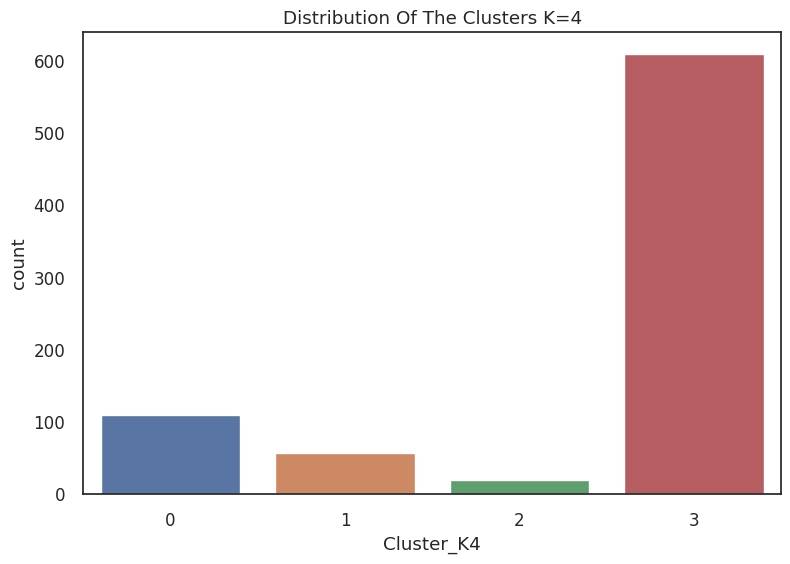

In [53]:
#Plotting countplot of clusters
import seaborn as sns

pl = sns.countplot(x=pca_df["Cluster_K4"])
pl.set_title("Distribution Of The Clusters K=4")
plt.show()

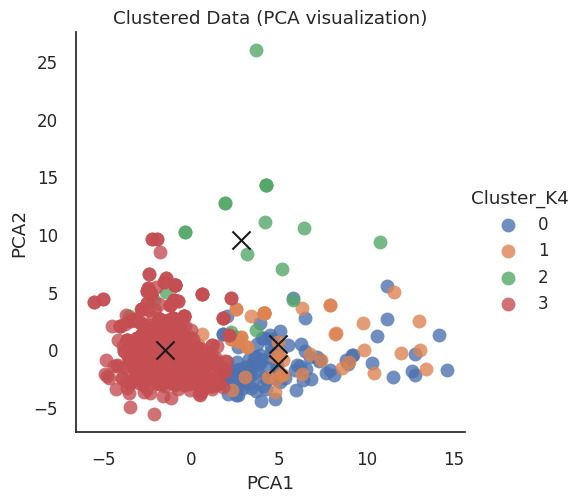

In [54]:
import matplotlib.pyplot as plt 
import seaborn as sns

sns.set(style='white', rc={'figure.figsize':(9,6)},font_scale=1.1)
# Plot 2D PCA Graph
sns.lmplot(
    x='PCA1', 
    y='PCA2', 
    data=pca_df, 
    hue='Cluster_K4',
    scatter_kws={"s": 100},
    fit_reg=False, 
    legend=True
    )
plt.scatter(centroids_V4[:,0], centroids_V4[:,1], marker="x", color='k', s=170)
plt.title('Clustered Data (PCA visualization)')
plt.show()

In [55]:
pca_df0 = pca_df[['PCA1', 'PCA2','Cluster_K4']]
result = pd.concat([dfAll_Stream, pca_df0], axis=1)
#print(result.shape)

result['COUNTER'] =1       #initially, set that counter to 1.
group_data = result.groupby(['Cluster_K4','pro_player','character', 'result', 'dead'])['COUNTER'].sum() #sum function
#print(group_data)
grouped_df = group_data.to_frame()
grouped_df

COUNTER
Cluster_K4 pro_player character result dead            
0          Normal     Jett      lose   dead           1
                                win    dead           1
                      Yoru      lose   dead          22
                                win    dead           8
                                       survive        6
...                                                 ...
3          Pro        Yoru      win    survive        9
                      sage      lose   dead          35
                                       survive        2
                                win    dead          23
                                       survive        6

[81 rows x 1 columns]

---------------------

In [56]:
pca_df00 = pca_df[['PCA1', 'PCA2','Cluster_K2','Cluster_K3','Cluster_K4']]
result00 = pd.concat([dfAll_Stream, pca_df00], axis=1)
print(result00.shape)
result00.head()

(795, 599)


Unnamed: 0  round       streamer character pro_player result     dead  \
0           0  รอบ 1   boltyanskiyy      Yoru        Pro    win  survive   
1           1  รอบ 2   boltyanskiyy      Yoru        Pro    win  survive   
2           2  รอบ 3   boltyanskiyy      Yoru        Pro    win     dead   
3           3  รอบ 4   boltyanskiyy      Yoru        Pro    win     dead   
4           4  รอบ 5   boltyanskiyy      Yoru        Pro    win  survive   

     Map  1  2  ...  582  583  584     sheet  taget      PCA1      PCA2  \
0  HAVEN  2  0  ...    0    0    0  Yoru_Pro      1 -3.234954  2.646490   
1  HAVEN  3  0  ...    0    0    0  Yoru_Pro      1 -2.254790  4.847817   
2  HAVEN  3  0  ...    0    0    0  Yoru_Pro      1 -1.740959 -0.740264   
3  HAVEN  1  0  ...    0    0    0  Yoru_Pro      1 -2.476322 -0.788739   
4  HAVEN  5  0  ...    0    0    0  Yoru_Pro      1 -2.222565 -1.045015   

   Cluster_K2  Cluster_K3  Cluster_K4  
0           1           0           3  
1           1           0           3  
2           1           0           3  
3           1           0           3  
4           1           0           3  

[5 rows x 599 columns]

In [104]:
my_list = list(range(1, 585))
print(len(my_list))
#my_list
action_number = []
for i in range(len(my_list)):
    action_number.append(f"Action-{my_list[i]}")
print(len(action_number))
action_number

584
584


['Action-1',
 'Action-2',
 'Action-3',
 'Action-4',
 'Action-5',
 'Action-6',
 'Action-7',
 'Action-8',
 'Action-9',
 'Action-10',
 'Action-11',
 'Action-12',
 'Action-13',
 'Action-14',
 'Action-15',
 'Action-16',
 'Action-17',
 'Action-18',
 'Action-19',
 'Action-20',
 'Action-21',
 'Action-22',
 'Action-23',
 'Action-24',
 'Action-25',
 'Action-26',
 'Action-27',
 'Action-28',
 'Action-29',
 'Action-30',
 'Action-31',
 'Action-32',
 'Action-33',
 'Action-34',
 'Action-35',
 'Action-36',
 'Action-37',
 'Action-38',
 'Action-39',
 'Action-40',
 'Action-41',
 'Action-42',
 'Action-43',
 'Action-44',
 'Action-45',
 'Action-46',
 'Action-47',
 'Action-48',
 'Action-49',
 'Action-50',
 'Action-51',
 'Action-52',
 'Action-53',
 'Action-54',
 'Action-55',
 'Action-56',
 'Action-57',
 'Action-58',
 'Action-59',
 'Action-60',
 'Action-61',
 'Action-62',
 'Action-63',
 'Action-64',
 'Action-65',
 'Action-66',
 'Action-67',
 'Action-68',
 'Action-69',
 'Action-70',
 'Action-71',
 'Action-72',
 

In [111]:
def sum_action(result00, Cluster_K):
    cluster = list(set(result00[Cluster_K]))
    action_listG = []
    for c in cluster:
        G1 = result00[result00[Cluster_K]==c].reset_index(drop=True)
        print(G1.shape)

        action_listG1 = []
        for k in my_list:
            action_listG1.append(sum(G1[f"{k}"]))
        action_listG.append(action_listG1)

        print(len(action_listG1))
        element_maxG1 = max(action_listG1)
        freq_actoion = action_listG1.index(element_maxG1)
        print(f"Group {c+1} : Action : {freq_actoion+1} ==> {element_maxG1} time")
        print("-"*125)
        
    return action_listG

In [121]:
def gropby_cluster(pca_df, Cluster_K):

    pca_df0 = pca_df[['PCA1', 'PCA2', Cluster_K]]
    result = pd.concat([dfAll_Stream, pca_df0], axis=1)
    #print(result.shape)

    result['COUNTER'] =1       #initially, set that counter to 1.
    group_data = result.groupby([Cluster_K,'pro_player','character', 'result', 'dead'])['COUNTER'].sum() #sum function
    #print(group_data)
    grouped_df = group_data.to_frame()
    
    return grouped_df

In [153]:
import matplotlib.pyplot as plt
from numpy.random import random


def plotXY_centroids(pca_df, centroids_V):
    dfYoru_Pro = pca_df[pca_df["target"]=='Yoru_Pro']
    dfYoru_Normal = pca_df[pca_df["target"]=='Yoru_Normal']
    dfSage_Pro = pca_df[pca_df["target"]=='Sage_Pro']
    dfSage_Normal = pca_df[pca_df["target"]=='Sage_Normal']
    dfJett_Pro = pca_df[pca_df["target"]=='Jett_Pro']
    dfJett_Normal = pca_df[pca_df["target"]=='Jett_Normal']
    dfHarbor_Pro = pca_df[pca_df["target"]=='Harbor_Pro']
    dfHarbor_Normal = pca_df[pca_df["target"]=='Harbor_Normal']


    #fig = plt.figure(figsize=(8, 5))

    marker_ = ["d", "o","v", "^", "<", "D", "*", "+"]

    Yoru_Pro = plt.scatter(dfYoru_Pro["PCA1"], dfYoru_Pro["PCA2"], marker=marker_[0], color='red')
    Yoru_Normal = plt.scatter(dfYoru_Normal["PCA1"], dfYoru_Normal["PCA2"], marker=marker_[0], color='blue')
    Sage_Pro = plt.scatter(dfSage_Pro["PCA1"], dfSage_Pro["PCA2"], marker=marker_[2], color='red')
    Sage_Normal = plt.scatter(dfSage_Normal["PCA1"], dfSage_Normal["PCA2"], marker=marker_[2], color='blue')
    Jett_Pro = plt.scatter(dfJett_Pro["PCA1"], dfJett_Pro["PCA2"], marker=marker_[4], color='red')
    Jett_Normal = plt.scatter(dfJett_Normal["PCA1"], dfJett_Normal["PCA2"], marker=marker_[4], color='blue')
    Harbor_Pro = plt.scatter(dfHarbor_Pro["PCA1"], dfHarbor_Pro["PCA2"], marker=marker_[6], color='red')
    Harbor_Normal = plt.scatter(dfHarbor_Normal["PCA1"], dfHarbor_Normal["PCA2"], marker=marker_[6], color='blue')


    plt.legend((Yoru_Pro, Yoru_Normal, Sage_Pro, Sage_Normal, Jett_Pro, Jett_Normal, Harbor_Pro, Harbor_Normal),
               ('Yoru_Pro', 'Yoru_Normal', 'Sage_Pro', 'Sage_Normal', 'Jett_Pro', 'Jett_Normal', 'Harbor_Pro', 'Harbor_Normal'),
               scatterpoints=1,
               loc='upper left',
               ncol=3,
               fontsize=8)

    #plt.scatter(centroids_V2[:,0], centroids_V2[:,1], marker="x", color='k', s=300)
    plt.scatter(centroids_V[:, 0], centroids_V[:, 1],
                    marker='x', s=300, linewidths=3,
                    color='cyan', zorder=10,lw=3)

    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")
    plt.title('2D PCA Graph of Valorant Dataset', fontsize=18)
    plt.show()

In [173]:
## Set Cluster
Cluster_K = 'Cluster_K4'

> ## K=2

In [164]:
from collections import Counter

action_listG = sum_action(result00, Cluster_K)
A = action_listG[0]
B = action_listG[1]
## Create Dictionary.
dicA = {action_number[i]: A[i] for i in range(len(action_number))}
dicB = {action_number[i]: B[i] for i in range(len(action_number))}


# finding 3 highest values in a Dictionary 
'''
Group 1
'''
k_dicA = Counter(dicA)
highA = k_dicA.most_common(3) 
print("***Group A*** with 3 highest action:")
print("Keys: Values")
 
for i in highA:
    print(i[0]," :",i[1]," ")
print("="*125)

'''
Group 2
'''
k_dicB = Counter(dicB)
highB = k_dicB.most_common(3) 
print("***Group B*** with 3 highest action:")
print("Keys: Values")
 
for i in highB:
    print(i[0]," :",i[1]," ")

(625, 599)
584
Group 1 : Action : 4 ==> 11850 time
-----------------------------------------------------------------------------------------------------------------------------
(152, 599)
584
Group 2 : Action : 1 ==> 3419 time
-----------------------------------------------------------------------------------------------------------------------------
(18, 599)
584
Group 3 : Action : 1 ==> 229 time
-----------------------------------------------------------------------------------------------------------------------------


***Group A*** with 3 highest action:
Keys: Values
Action-4  : 11850  
Action-35  : 7919  
Action-291  : 7919  
***Group B*** with 3 highest action:
Keys: Values
Action-1  : 3419  
Action-13  : 2211  
Action-77  : 2211  


> ## K=3

In [169]:
from collections import Counter

action_listG = sum_action(result00, Cluster_K)
A = action_listG[0]
B = action_listG[1]
C = action_listG[2]
## Create Dictionary.
dicA = {action_number[i]: A[i] for i in range(len(action_number))}
dicB = {action_number[i]: B[i] for i in range(len(action_number))}
dicC = {action_number[i]: C[i] for i in range(len(action_number))}

# finding 3 highest values in a Dictionary 
'''
Group 1 
'''
k_dicA = Counter(dicA)
highA = k_dicA.most_common(3) 
print("***Group A*** with 3 highest action:")
print("Keys: Values")
 
for i in highA:
    print(i[0]," :",i[1]," ")
print("="*125)

'''
Group 2
'''

k_dicB = Counter(dicB)
highB = k_dicB.most_common(3) 
print("***Group B*** with 3 highest action:")
print("Keys: Values")
 
for i in highB:
    print(i[0]," :",i[1]," ")
    
'''
Group 3 

'''
k_dicC = Counter(dicC)
highC = k_dicC.most_common(3) 
print("***Group C*** with 3 highest action:")
print("Keys: Values")
 
for i in highC:
    print(i[0]," :",i[1]," ")

(625, 599)
584
Group 1 : Action : 4 ==> 11850 time
-----------------------------------------------------------------------------------------------------------------------------
(152, 599)
584
Group 2 : Action : 1 ==> 3419 time
-----------------------------------------------------------------------------------------------------------------------------
(18, 599)
584
Group 3 : Action : 1 ==> 229 time
-----------------------------------------------------------------------------------------------------------------------------
***Group A*** with 3 highest action:
Keys: Values
Action-4  : 11850  
Action-35  : 7919  
Action-291  : 7919  
***Group B*** with 3 highest action:
Keys: Values
Action-1  : 3419  
Action-13  : 2211  
Action-77  : 2211  
***Group C*** with 3 highest action:
Keys: Values
Action-1  : 229  
Action-4  : 229  
Action-3  : 192  


> ## K=4

In [174]:
from collections import Counter

action_listG = sum_action(result00, Cluster_K)
A = action_listG[0]
B = action_listG[1]
C = action_listG[2]
D = action_listG[3]
## Create Dictionary.
dicA = {action_number[i]: A[i] for i in range(len(action_number))}
dicB = {action_number[i]: B[i] for i in range(len(action_number))}
dicC = {action_number[i]: C[i] for i in range(len(action_number))}
dicD = {action_number[i]: D[i] for i in range(len(action_number))}

# finding 3 highest values in a Dictionary 
'''
Group 1 
'''
k_dicA = Counter(dicA)
highA = k_dicA.most_common(3) 
print("***Group A*** with 3 highest action:")
print("Keys: Values")
 
for i in highA:
    print(i[0]," :",i[1]," ")
print("="*125)

'''
Group 2
'''

k_dicB = Counter(dicB)
highB = k_dicB.most_common(3) 
print("***Group B*** with 3 highest action:")
print("Keys: Values")
 
for i in highB:
    print(i[0]," :",i[1]," ")
    
'''
Group 3 

'''
k_dicC = Counter(dicC)
highC = k_dicC.most_common(3) 
print("***Group C*** with 3 highest action:")
print("Keys: Values")
 
for i in highC:
    print(i[0]," :",i[1]," ")
    

'''
Group 4

'''
k_dicD = Counter(dicD)
highD = k_dicD.most_common(3) 
print("***Group D*** with 3 highest action:")
print("Keys: Values")
 
for i in highD:
    print(i[0]," :",i[1]," ")

(110, 599)
584
Group 1 : Action : 1 ==> 2820 time
-----------------------------------------------------------------------------------------------------------------------------
(57, 599)
584
Group 2 : Action : 4 ==> 903 time
-----------------------------------------------------------------------------------------------------------------------------
(19, 599)
584
Group 3 : Action : 4 ==> 262 time
-----------------------------------------------------------------------------------------------------------------------------
(609, 599)
584
Group 4 : Action : 4 ==> 11578 time
-----------------------------------------------------------------------------------------------------------------------------
***Group A*** with 3 highest action:
Keys: Values
Action-1  : 2820  
Action-13  : 1893  
Action-77  : 1893  
***Group B*** with 3 highest action:
Keys: Values
Action-4  : 903  
Action-1  : 719  
Action-35  : 501  
***Group C*** with 3 highest action:
Keys: Values
Action-4  : 262  
Action-1  : 231  

In [175]:
dfCluster = gropby_cluster(pca_df, Cluster_K)
dfCluster

COUNTER
Cluster_K4 pro_player character result dead            
0          Normal     Jett      lose   dead           1
                                win    dead           1
                      Yoru      lose   dead          22
                                win    dead           8
                                       survive        6
...                                                 ...
3          Pro        Yoru      win    survive        9
                      sage      lose   dead          35
                                       survive        2
                                win    dead          23
                                       survive        6

[81 rows x 1 columns]

In [176]:
# Convert all multi indexes to columns
dfCluster.reset_index(inplace=True)
GroupK = list(set(dfCluster[Cluster_K]))
for k in GroupK:
    print(f"Cluster Group: {k+1}")
    df_GroupK = dfCluster[dfCluster[Cluster_K]==k].reset_index(drop=True)
    level = list(set(df_GroupK["pro_player"]))
    for L in level:
        df_GroupKLevel = df_GroupK[df_GroupK['pro_player']==L].reset_index(drop=True)
        print(f"LEVEL: {L}")
        set_charec = set(df_GroupKLevel["character"])
        print(f"Character : {set_charec}")
        print("-"*100)
    print("*"*125)

Cluster Group: 1
LEVEL: Pro
Character : {'Yoru', 'sage'}
----------------------------------------------------------------------------------------------------
LEVEL: Normal
Character : {'Jett', 'Yoru', 'sage'}
----------------------------------------------------------------------------------------------------
*****************************************************************************************************************************
Cluster Group: 2
LEVEL: Pro
Character : {'Jett', 'Yoru', 'Harbor', 'sage'}
----------------------------------------------------------------------------------------------------
LEVEL: Normal
Character : {'Jett', 'Yoru', 'Harbor', 'sage'}
----------------------------------------------------------------------------------------------------
*****************************************************************************************************************************
Cluster Group: 3
LEVEL: Pro
Character : {'Jett', 'Yoru', 'Harbor', 'sage'}
-------------------------

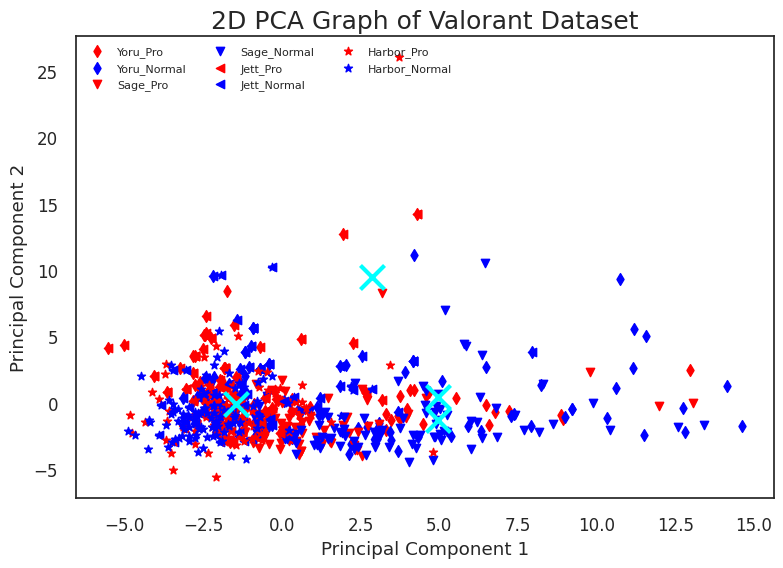

In [177]:
plotXY_centroids(pca_df, centroids_V4)

In [106]:
cluster = [0,1]
action_listG = []
for c in cluster:
    G1 = result00[result00["Cluster_K2"]==c].reset_index(drop=True)
    print(G1.shape)

    action_listG1 = []
    for k in my_list:
        action_listG1.append(sum(G1[f"{k}"]))
    action_listG.append(action_listG1)

    print(len(action_listG1))
    element_maxG1 = max(action_listG1)
    freq_actoion = action_listG1.index(element_maxG1)
    print(f"Group {c+1} : Action : {freq_actoion+1} ==> {element_maxG1} time")
    print("-"*125)

(154, 599)
584
Group 1 : Action : 1 ==> 3360 time
-----------------------------------------------------------------------------------------------------------------------------
(641, 599)
584
Group 2 : Action : 4 ==> 12005 time
-----------------------------------------------------------------------------------------------------------------------------


In [107]:
A = action_listG[0]
B = action_listG[1]
A

[3360,
 56,
 1175,
 1431,
 401,
 77,
 109,
 220,
 9,
 385,
 454,
 185,
 2147,
 25,
 29,
 49,
 33,
 5,
 6,
 4,
 5,
 0,
 0,
 2,
 1,
 503,
 163,
 36,
 384,
 13,
 25,
 22,
 1,
 154,
 653,
 74,
 448,
 8,
 20,
 45,
 8,
 67,
 65,
 95,
 139,
 3,
 3,
 13,
 0,
 13,
 16,
 2,
 21,
 24,
 0,
 0,
 0,
 18,
 17,
 5,
 35,
 0,
 31,
 2,
 4,
 21,
 33,
 0,
 70,
 1,
 1,
 80,
 9,
 385,
 454,
 185,
 2147,
 25,
 29,
 49,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 33,
 5,
 6,
 4,
 5,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 503,
 163,
 36,
 384,
 13,
 25,
 22,
 0,
 0,
 0,
 0

In [89]:
A = action_listG[0]
B = action_listG[1]
re_action_number, re_A, re_B = [], [], [] 
for j in range(len(action_number)):
    if A[j] != 0 and B[j] != 0:
        re_A.append(A[j])
        re_B.append(B[j])
        re_action_number.append(action_number[j])
    elif A[j] == 0 and B[j] != 0:
        re_A.append(A[j])
        re_B.append(B[j])
        re_action_number.append(action_number[j])
    elif A[j] != 0 and B[j] == 0:
        re_A.append(A[j])
        re_B.append(B[j])
        re_action_number.append(action_number[j])
        
print(len(re_action_number), len(re_A), len(re_B))

122 122 122


In [100]:
re_action_number

['Action-1',
 'Action-2',
 'Action-3',
 'Action-4',
 'Action-5',
 'Action-6',
 'Action-7',
 'Action-8',
 'Action-9',
 'Action-10',
 'Action-11',
 'Action-12',
 'Action-13',
 'Action-14',
 'Action-15',
 'Action-16',
 'Action-17',
 'Action-19',
 'Action-21',
 'Action-24',
 'Action-25',
 'Action-26',
 'Action-27',
 'Action-28',
 'Action-29',
 'Action-30',
 'Action-31',
 'Action-32',
 'Action-33',
 'Action-34',
 'Action-35',
 'Action-36',
 'Action-37',
 'Action-38',
 'Action-39',
 'Action-40',
 'Action-41',
 'Action-42',
 'Action-43',
 'Action-44',
 'Action-45',
 'Action-46',
 'Action-48',
 'Action-50',
 'Action-51',
 'Action-52',
 'Action-53',
 'Action-54',
 'Action-56',
 'Action-58',
 'Action-59',
 'Action-65',
 'Action-66',
 'Action-67',
 'Action-68',
 'Action-69',
 'Action-70',
 'Action-72',
 'Action-73',
 'Action-74',
 'Action-75',
 'Action-76',
 'Action-77',
 'Action-78',
 'Action-79',
 'Action-80',
 'Action-145',
 'Action-147',
 'Action-149',
 'Action-152',
 'Action-217',
 'Action-2

In [98]:
re_A

[3360,
 56,
 1175,
 1431,
 401,
 77,
 109,
 220,
 9,
 385,
 454,
 185,
 2147,
 25,
 29,
 49,
 33,
 5,
 6,
 4,
 5,
 2,
 1,
 503,
 163,
 36,
 384,
 13,
 25,
 22,
 1,
 154,
 653,
 74,
 448,
 8,
 20,
 45,
 8,
 67,
 65,
 95,
 139,
 3,
 3,
 13,
 13,
 16,
 2,
 21,
 24,
 18,
 17,
 5,
 35,
 31,
 2,
 4,
 21,
 33,
 70,
 1,
 1,
 80,
 9,
 385,
 454,
 185,
 2147,
 25,
 29,
 49,
 33,
 5,
 6,
 4,
 5,
 2,
 1,
 503,
 163,
 36,
 384,
 13,
 25,
 22,
 1,
 154,
 653,
 74,
 448,
 8,
 20,
 45,
 8,
 67,
 65,
 95,
 139,
 3,
 3,
 13,
 13,
 16,
 2,
 21,
 24,
 18,
 17,
 5,
 35,
 31,
 2,
 18,
 17,
 5,
 35,
 31,
 2]

In [101]:
re_B

[3202,
 43,
 4847,
 12005,
 1025,
 170,
 12,
 3057,
 3,
 388,
 1111,
 74,
 1259,
 8,
 5,
 214,
 17,
 6,
 4,
 13,
 4,
 2475,
 1529,
 204,
 285,
 44,
 1,
 183,
 5,
 1527,
 8001,
 437,
 974,
 59,
 6,
 702,
 2,
 204,
 371,
 217,
 72,
 1,
 150,
 48,
 46,
 2,
 13,
 39,
 16,
 4,
 8,
 12,
 174,
 656,
 90,
 276,
 17,
 1764,
 3,
 388,
 1111,
 74,
 1259,
 8,
 5,
 214,
 17,
 6,
 4,
 13,
 4,
 2475,
 1529,
 204,
 285,
 44,
 1,
 183,
 5,
 1527,
 8001,
 437,
 974,
 59,
 6,
 702,
 2,
 204,
 371,
 217,
 72,
 1,
 150,
 48,
 46,
 2,
 13,
 39,
 16,
 4,
 8,
 4,
 8]

In [124]:
# print(re_action_number)
# print(re_A)
# print(re_B)

In [90]:
import plotly.graph_objects as go

# categories = ['processing cost','mechanical properties','chemical stability',
#               'thermal stability', 'device integration']
categories = re_action_number

fig = go.Figure()

fig.add_trace(go.Scatterpolar(
      r=re_A,
      theta=categories,
      fill='toself',
      name='Group A'
))
fig.add_trace(go.Scatterpolar(
      r=re_B,
      theta=categories,
      fill='toself',
      name='Group B'
))

fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True
    )),
  showlegend=False
)

fig.show()

## Group A

In [91]:
A = action_listG[0]
re_action_number, re_A = [], []
for j in range(len(action_number)):
    if A[j] != 0:
        re_A.append(A[j])
        re_action_number.append(action_number[j])
        
print(len(re_action_number), len(re_A))

119 119


In [92]:
import plotly.graph_objects as go

fig = go.Figure(data=go.Scatterpolar(
  r=re_A,
  theta=re_action_number,
  fill='toself'
))

fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True
    ),
  ),
  showlegend=False
)

fig.show()

## Group B

In [93]:
B = action_listG[1]
re_action_number, re_B = [], []
for j in range(len(action_number)):
    if B[j] != 0:
        re_B.append(B[j])
        re_action_number.append(action_number[j])
        
print(len(re_action_number), len(re_B))

103 103


In [94]:
import plotly.graph_objects as go

fig = go.Figure(data=go.Scatterpolar(
  r=re_B,
  theta=re_action_number,
  fill='toself'
))

fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True
    ),
  ),
  showlegend=False
)

fig.show()

In [95]:
import plotly.graph_objects as go

# categories = ['processing cost','mechanical properties','chemical stability',
#               'thermal stability', 'device integration']
categories = action_number

fig = go.Figure()

fig.add_trace(go.Scatterpolar(
      r=action_listG[0],
      theta=categories,
      fill='toself',
      name='Group A'
))
fig.add_trace(go.Scatterpolar(
      r=action_listG[1],
      theta=categories,
      fill='toself',
      name='Group B'
))

fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[0, 5]
    )),
  showlegend=False
)

fig.show()

In [96]:
import plotly.graph_objects as go

# categories = ['processing cost','mechanical properties','chemical stability',
#               'thermal stability', 'device integration']
categories = action_number

fig = go.Figure()

fig.add_trace(go.Scatterpolar(
      r=action_listG[0],
      theta=categories,
      fill='toself',
      name='Group A'
))
fig.add_trace(go.Scatterpolar(
      r=action_listG[1],
      theta=categories,
      fill='toself',
      name='Group B'
))

fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True
    )),
  showlegend=False
)

fig.show()

In [97]:
import plotly.graph_objects as go

# categories = ['processing cost','mechanical properties','chemical stability',
#               'thermal stability', 'device integration']
categories = action_number

fig = go.Figure()

fig.add_trace(go.Scatterpolar(
      r=action_listG[0],
      theta=categories,
      fill='toself',
      name='Group A'
))
fig.add_trace(go.Scatterpolar(
      r=action_listG[1],
      theta=categories,
      fill='toself',
      name='Group B'
))

fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[0, 1000]
    )),
  showlegend=False
)

fig.show()